# European Cancer Data – Data Analytics Project
# Objectives

Develop data visualizations to support the hypothesis.

# Inputs

# Dataset: cancer_patient_data_cleaned.csv
* Required Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly**  
* Columns of Interest:    
* Demographics: Age, Gender  
* target Features:** Survival Status, Survival Duration (months)  
* Significant Features:** Cancer Types, Cancer Stage  
* Lifestyle Indicators:** Smoking Status, Alcohol Consumption, BMI, Socioeconomic Status, Urban vs. Rural, Comorbidities, Quality of Life Score  
* Healthcare Indicators:** Healthcare System, Follow-up Visits, Recurrence, Clinical Trial Participation  
* Other Indicators:** Treatment_Delay_Category, Severity_Index, Access_Risk, Proxy_Comorbidity_Score  

# Outputs  

**Basic Data Visualisations:**

* Bar chart to show distribution of target variable (Survival Status) by Access Risk.
* Histograms for distribution or features of numeric data.
* Boxplot to identify outliers of numerical data of target variable (Survival Duration (months) by Proxy_Comorbidity_Score) .
* Bar chart to compare categorical variables with the target variable.
* Stacked bar chart to check the porportions of categorical variables.
* Correlation heatmap to assess relationships between numerical variables and the target variable (Survival Duration (months)).
* Pie charts for BMI.

**Advance Data Visualisations:**

Create wireframe for dashboard  
Create dashboard in Tableau  

# Section 2 : Basic Data Visualisation
# Changing work directory  
To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [5]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data/jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:  
os.chir() to define the new current directory   
Confirming the new current directory

In [6]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [7]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data'

In [8]:
DestinationFolder = "data/processed"
print(DestinationFolder)

data/processed


# Importing Libraries and Packages
Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway, ttest_ind, kruskal
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [10]:
df = pd.read_csv(f'{DestinationFolder}/cancer_patient_data_cleaned.csv')
df

Unnamed: 0  Patient ID   Country                  Region  Age  Gender  \
0              0           1   Finland       Southwest Finland   89    Male   
1              1           6    Sweden         Västra Götaland   28    Male   
2              2          10     Spain               Andalusia   77  Female   
3              3          11     Spain               Andalusia   22  Female   
4              4          16   Germany  North Rhine-Westphalia   53    Male   
...          ...         ...       ...                     ...  ...     ...   
3622        3622        9990  Portugal                  Lisbon   71  Female   
3623        3623        9993    Norway               Trøndelag   89  Female   
3624        3624        9994   Denmark                 Zealand   43    Male   
3625        3625        9995   Belgium                Wallonia   36    Male   
3626        3626        9999   Ireland                  Dublin   21    Male   

     Cancer Type  Cancer Stage Diagnosis Date Treatment Start Date  ...  \
0         Breast             3     2015-08-10           2015-09-20  ...   
1     Pancreatic             4     2019-03-06           2019-05-16  ...   
2        Ovarian             1     2013-07-22           2013-11-08  ...   
3     Pancreatic             2     2012-12-27           2013-06-06  ...   
4         Breast             1     2012-07-24           2012-08-14  ...   
...          ...           ...            ...                  ...  ...   
3622      Breast             4     2017-10-25           2018-02-15  ...   
3623      Breast             1     2020-11-12           2020-12-01  ...   
3624  Colorectal             1     2010-05-30           2010-08-25  ...   
3625      Breast             3     2013-02-06           2013-03-05  ...   
3626  Pancreatic             1     2014-12-27           2015-02-10  ...   

     Comorbidities Quality of Life Score IsSurvivalStatus Age Group  \
0         Diabetes                     5                1       75+   
1          Obesity                     6                1       <30   
2     Hypertension                     7                1       75+   
3          Unknown                     2                1       <30   
4     Hypertension                     4                0     45-60   
...            ...                   ...              ...       ...   
3622       Unknown                     8                1     60-75   
3623       Unknown                     1                3       75+   
3624       Obesity                     1                1     30-45   
3625  Hypertension                     1                1     30-45   
3626       Obesity                     7                1       <30   

      Time to Treatment (Days)         SDM_Category   BMI_Category IsGender  \
0                           41            Two Years          Obese        0   
1                           71           Four Years  Normal weight        0   
2                          109           Four Years          Obese        1   
3                          161             One Year  Normal weight        1   
4                           21           Four Years          Obese        0   
...                        ...                  ...            ...      ...   
3622                       113           Five Years     Overweight        1   
3623                        19            Two Years  Normal weight        1   
3624                        87  Less than Six Years  Normal weight        0   
3625                        27             One Year  Normal weight        0   
3626                        45             One Year  Normal weight        0   

     IsRecurrence  IsClinical_Trial_Participation  
0               1                               1  
1               0                               0  
2               0                               0  
3               0                               0  
4               1                               0  
...           ...                         

Drop unwanted collumns

In [8]:
#drop collumns which are not relevant
df = df.drop('Unnamed: 0', axis=1)

Add some more collumns encodings and transformations

In [10]:
df['Treatment_Delay_Category'] = pd.cut(
    df['Time to Treatment (Days)'],
    bins=[-1, 14, 30, 90, 9999],
    labels=['<2 weeks', '2–4 weeks', '1–3 months', '>3 months']
)


In [11]:
df['Severity_Index'] = df['Cancer Stage'].astype(int)


In [12]:
df['Access_Risk'] = df['Urban vs. Rural'].astype(str) + '_' + df['Treatment_Delay_Category'].astype(str)


In [16]:
# Convert 'Yes' to 1, 'No' to 0 in smoking, alcohol, and family history columns
df['Smoking Status'] = df['Smoking Status'].astype(str).str.lower().map({'current': 1, 'never': 0, 'former': 0, 'unknown': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype(str).str.lower().map({'heavy': 1, 'moderate': 0, 'unknown': 0})
df['Family History'] = df['Family History'].astype(str).str.lower().map({'yes': 1, 'no': 0, 'unknown': 0})

# Fill any missing values with 0
#df[['Smoking Status', 'Alcohol Consumption', 'Family History']] = df[['Smoking Status', 'Alcohol Consumption', 'Family History']].fillna(0)

# Create the simplified score
df['Proxy_Comorbidity_Score'] = (
    df['Smoking Status'] +
    df['Alcohol Consumption'] +
    df['Family History']
)

In [98]:
df.columns.values.tolist()

['Patient ID',
 'Country',
 'Region',
 'Age',
 'Gender',
 'Cancer Type',
 'Cancer Stage',
 'Diagnosis Date',
 'Treatment Start Date',
 'Treatment End Date',
 'Treatment Type',
 'Hospital Type',
 'Survival Status',
 'Survival Duration (Months)',
 'Genetic Markers',
 'Family History',
 'Smoking Status',
 'Alcohol Consumption',
 'BMI',
 'Socioeconomic Status',
 'Urban vs. Rural',
 'Healthcare System',
 'Follow-up Visits',
 'Recurrence',
 'Clinical Trial Participation',
 'Comorbidities',
 'Quality of Life Score',
 'IsSurvivalStatus',
 'Age Group',
 'Time to Treatment (Days)',
 'SDM_Category',
 'BMI_Category',
 'IsGender',
 'IsRecurrence',
 'IsClinical_Trial_Participation',
 'Treatment_Delay_Category',
 'Severity_Index',
 'Access_Risk',
 'Proxy_Comorbidity_Score',
 'lat',
 'lon']

Access Risk is the measure of the patients from urban or rural areas and Treatment delay. The below plot indicates the Survival status for these patients based on the Access risks.

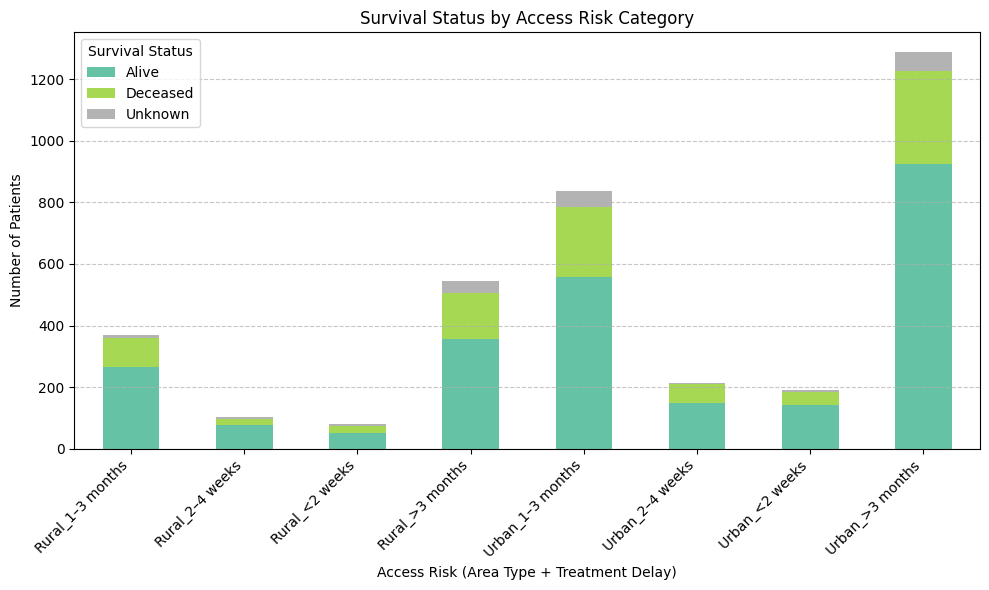

In [18]:
# Create grouped data for plotting
access_risk_survival = df.groupby(['Access_Risk', 'Survival Status']).size().unstack(fill_value=0)

# Plot as a stacked bar chart
access_risk_survival.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Survival Status by Access Risk Category")
plt.xlabel("Access Risk (Area Type + Treatment Delay)")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Survival Status")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Histograms for the numeric data in our dataset

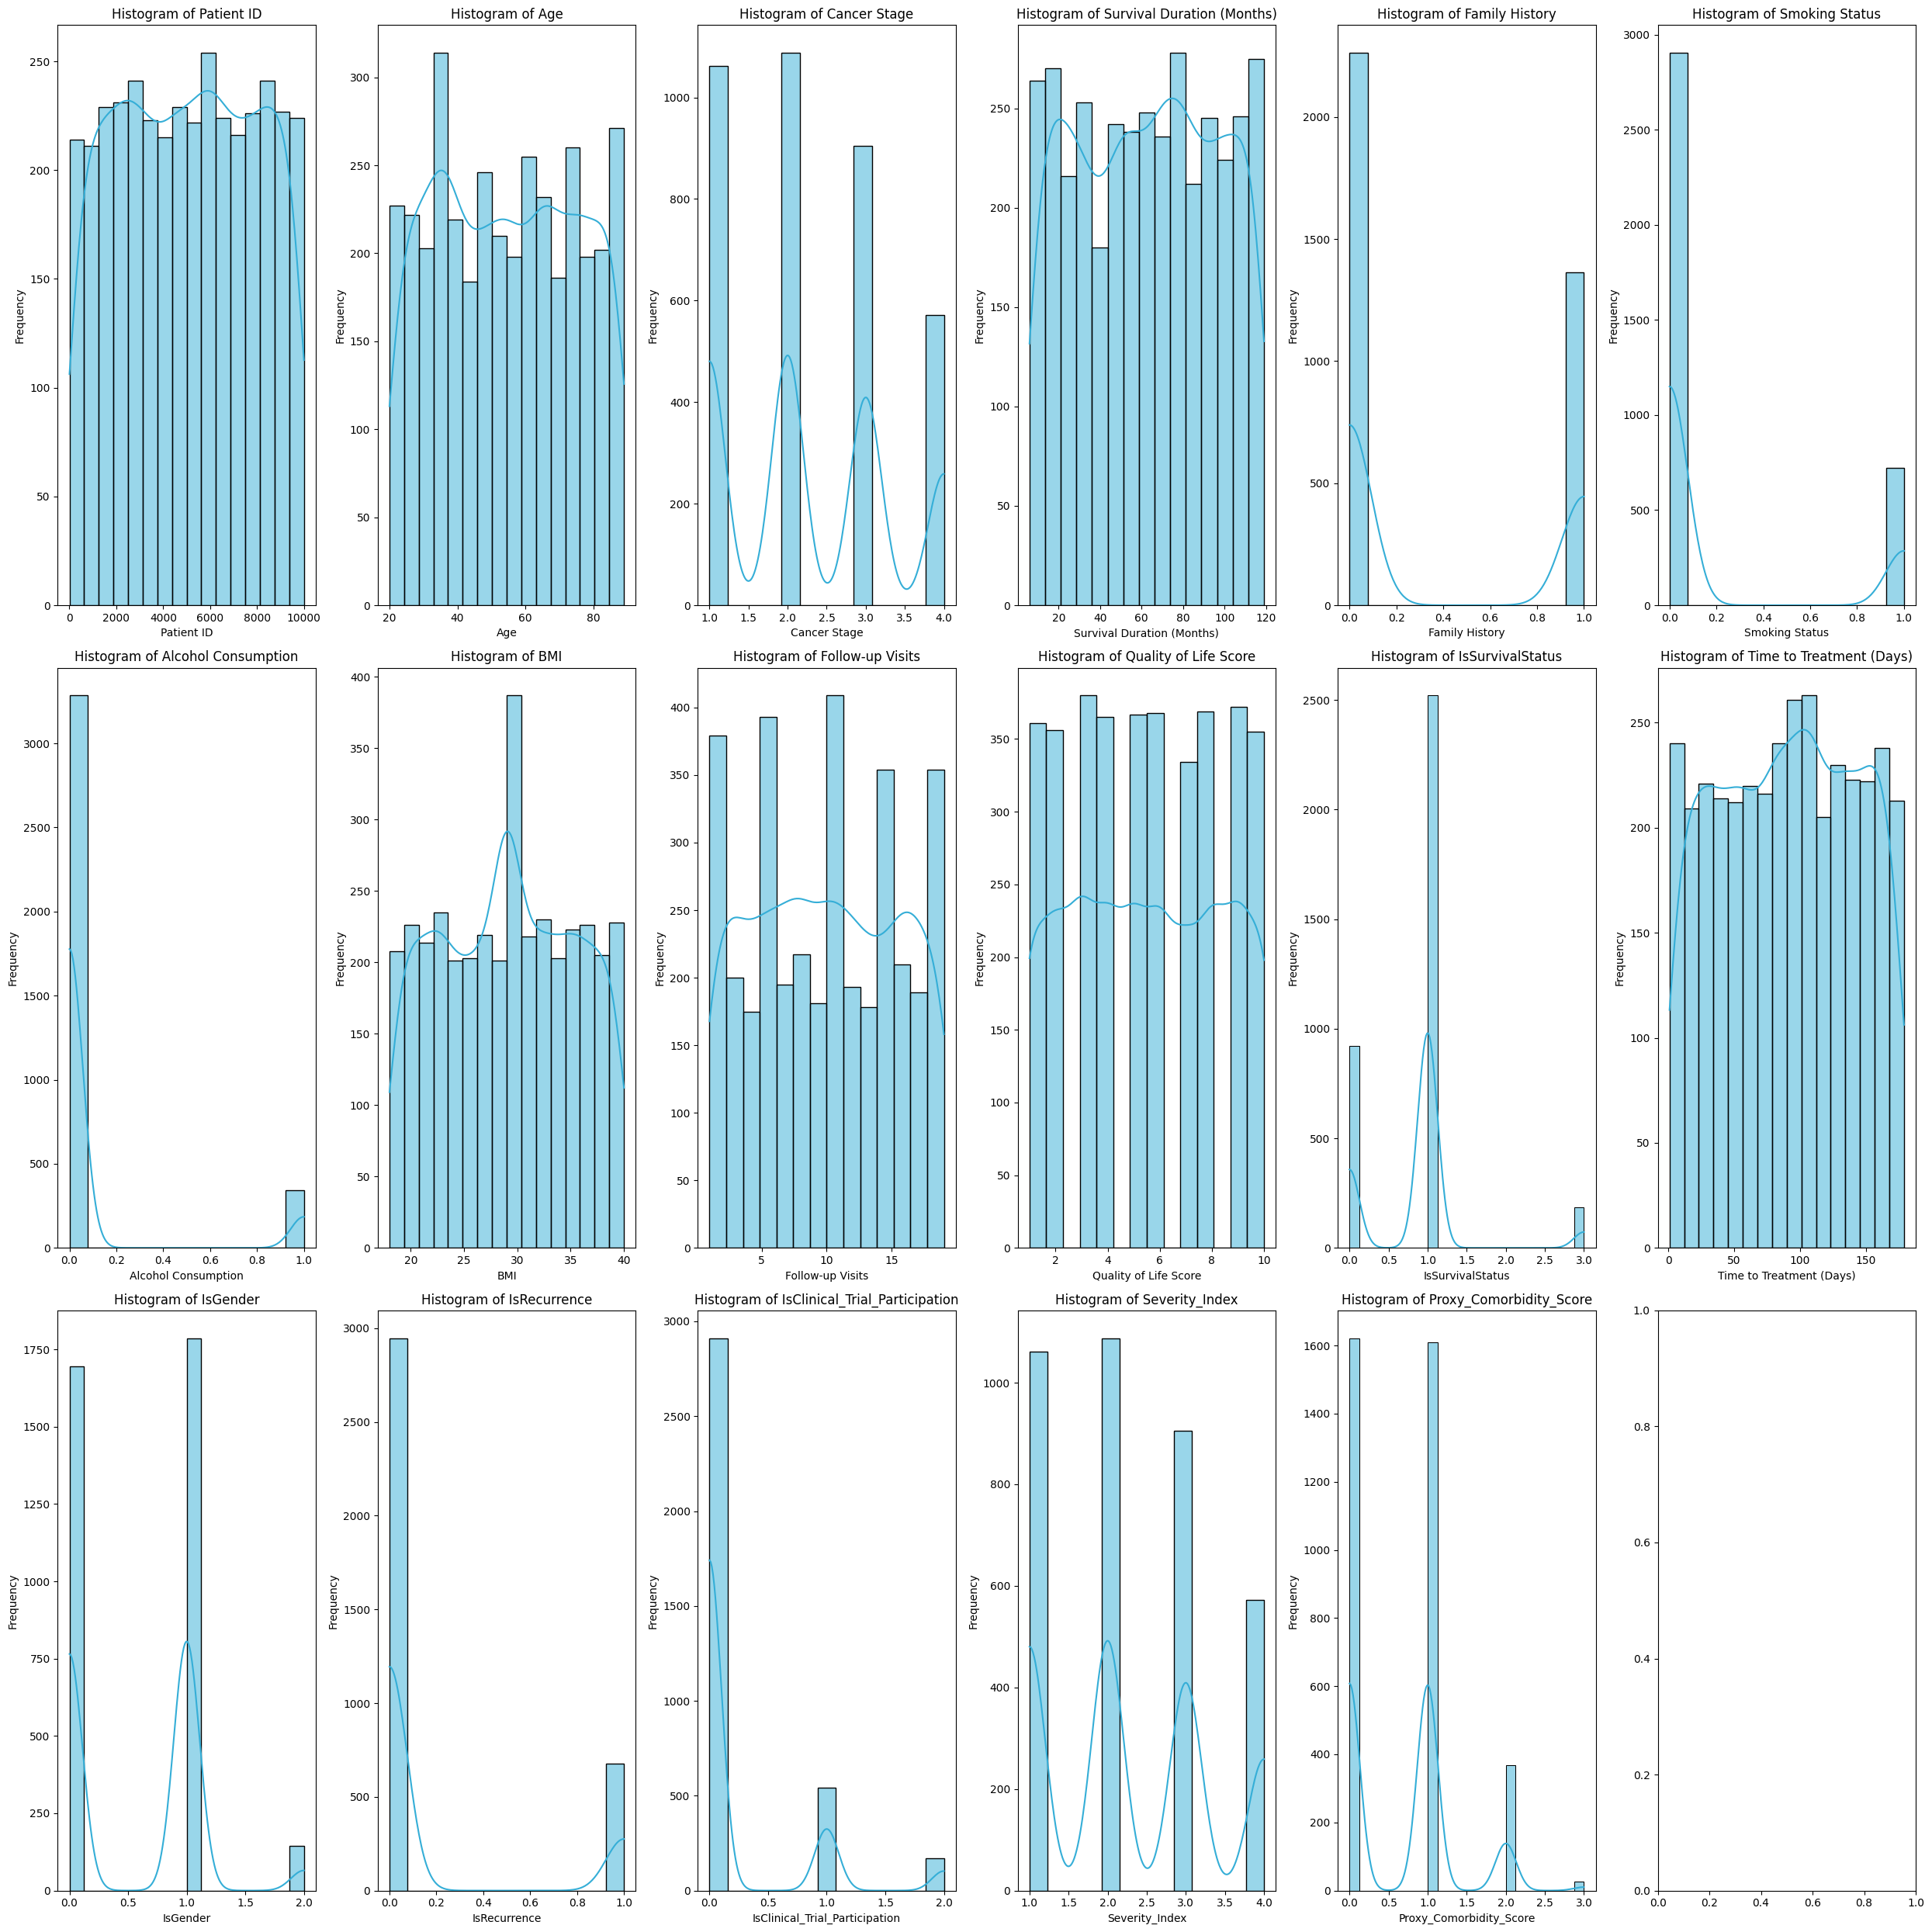

In [31]:
# Select numerical columns
numerical_features = df.select_dtypes(include=[float, int]).columns
# Custom palette colors
custom_palette = ['#35AED7'] 

# Create separate histograms for each numerical feature and display them side by side
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(25, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, color=custom_palette[0], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

**Strong Positive Correlations**  

* Survival Duration (Months) and SDM_Category: r ≈ 0.75  
* As survival duration increases, the SDM category (likely categorical bins of survival) increases.  
* Comorbidities and Proxy_Comorbidity_Score: r ≈ 1.0  
* These are either the same or very closely related metrics — likely that the proxy score is derived from comorbidity count.  
* Access_Risk and Urban vs. Rural: r ≈ 0.81  
* Suggests that access risk is strongly tied to geographic setting — rural areas likely have higher access risk.  
* Severity_Index and Cancer Stage: r = 1.00  
Implies perfect mapping; possibly one was derived from the other.  
* BMI and BMI_Category: r = 0.27  

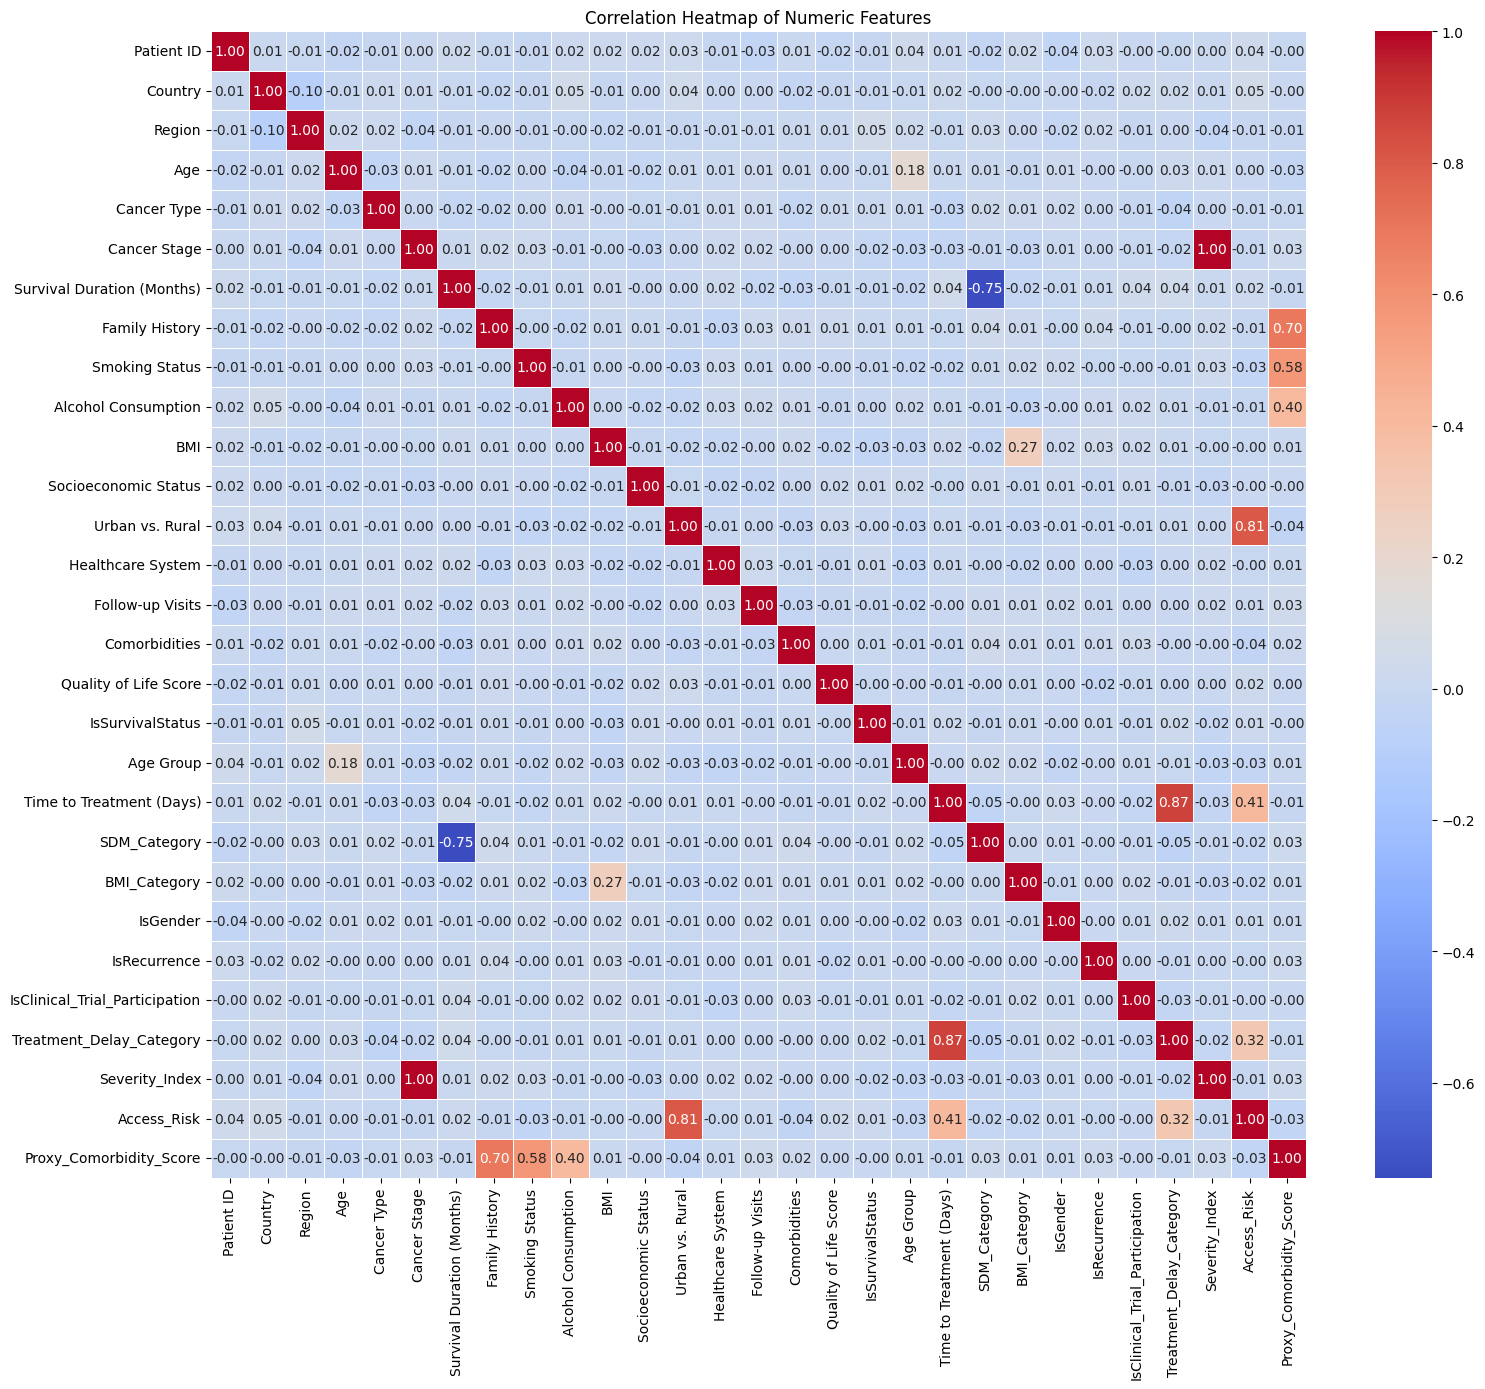

In [58]:
# Prepare data for correlation heatmap

# Encode categorical variables
df_encoded = df.copy()
categorical_columns = ['Cancer Type', 'Cancer Stage', 'Country', 'Region', 'Smoking Status', 'Alcohol Consumption', 'Socioeconomic Status', 
                       'Urban vs. Rural', 'Healthcare System', 'Family History', 'Comorbidities', 'Comorbidities',
                       'Age Group', 'SDM_Category','BMI_Category', 'Treatment_Delay_Category',
                    'Severity_Index', 'Access_Risk', 'Proxy_Comorbidity_Score']

for col in categorical_columns:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Drop non-numeric columns for correlation
numeric_cols = df_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()



Barplot for target feature Survival Duration (months)

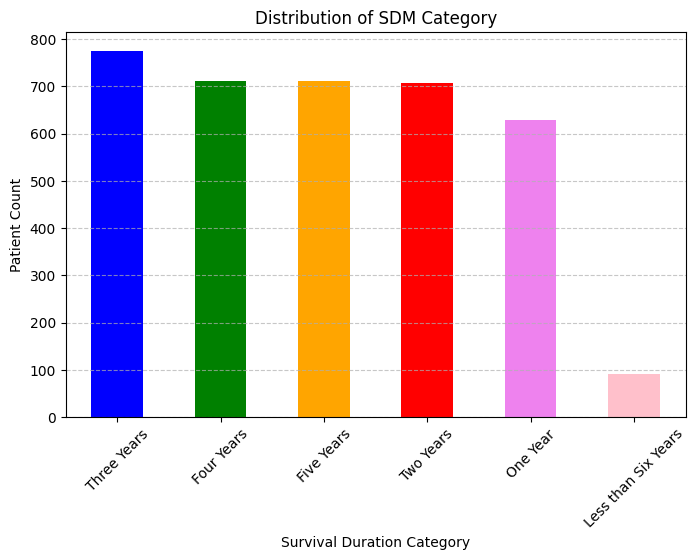

In [14]:
# Matplotlib - Bar plot shows obese individuals have SDM > 1 year 
# Count occurrences of each SDM category
SDM_counts = df["SDM_Category"].value_counts()

# Plot the SDM categories as a bar chart
plt.figure(figsize=(8, 5))
SDM_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'violet', 'pink'])
plt.xlabel("Survival Duration Category")
plt.ylabel("Patient Count")
plt.title("Distribution of SDM Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

These visualizations will clearly show whether the "Obese" BMI group has a higher count in the "SDM > 1 year" category, 
as per your hypothesis.

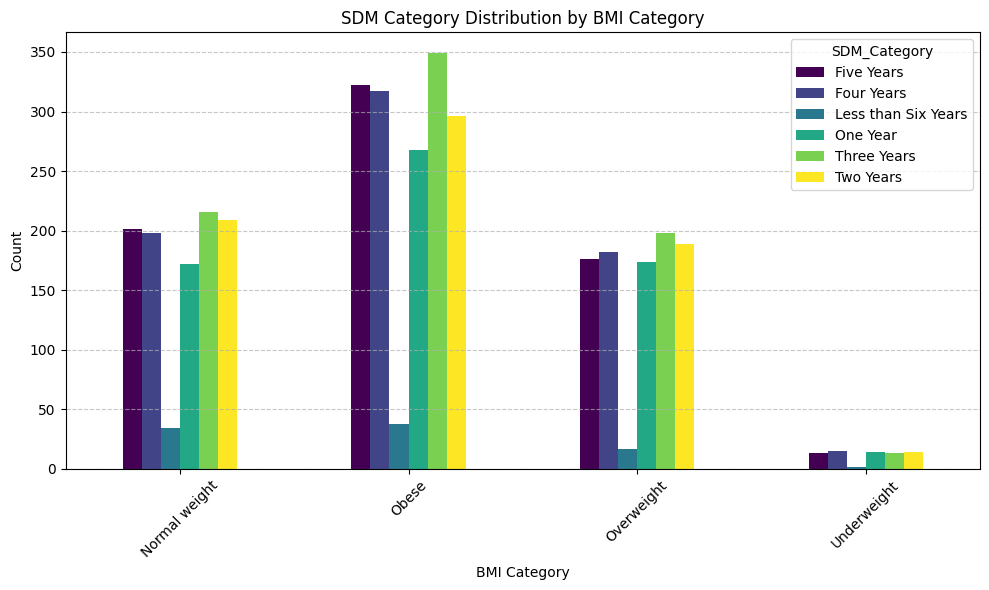

In [11]:
# Create a crosstab of SDM_Category by BMI Category
crosstab = pd.crosstab(df['BMI_Category'], df['SDM_Category'])

# Plot grouped bar chart
crosstab.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("SDM Category Distribution by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The boxplots shows the target variables Survival Status vs Survival Duration (months) basedon the Quality of Life score

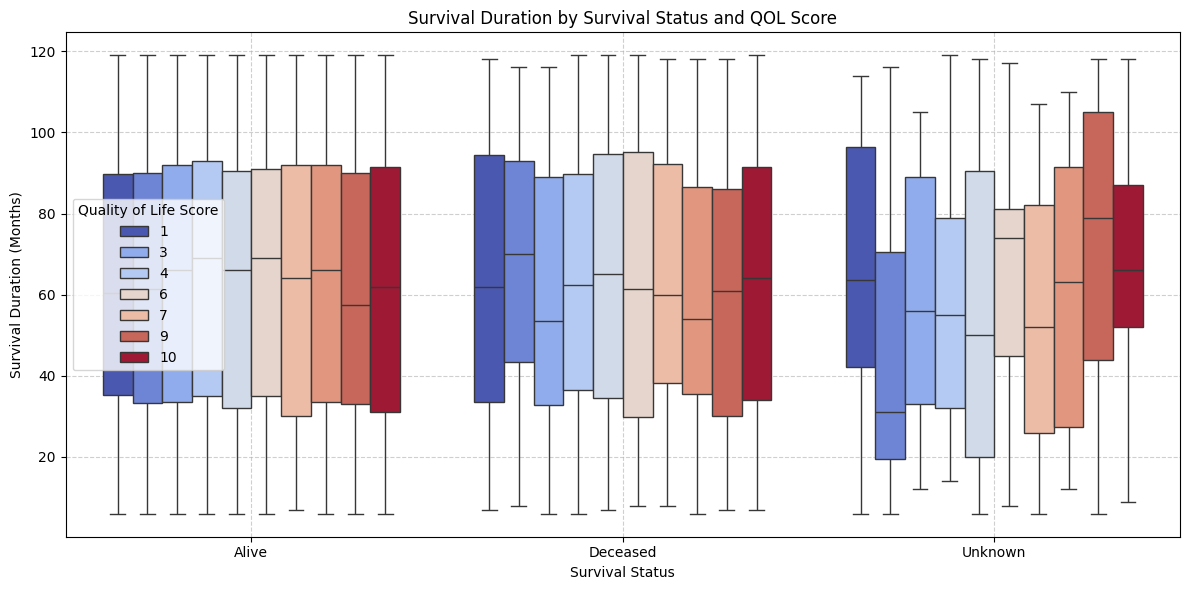

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Survival Status',
    y='Survival Duration (Months)',
    hue='Quality of Life Score',
    palette='coolwarm'
)
plt.title('Survival Duration by Survival Status and QOL Score')
plt.xlabel('Survival Status')
plt.ylabel('Survival Duration (Months)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**Heatmap visualization for Avg Survival Duration by QOL (Quality Of Life) Score and Comorbidity Score
* Darker colors (e.g. deep blue or purple in viridis) = lower average survival
* Brighter colors (e.g. yellow-green) = higher average survival
* White or light cells = missing or very low sample sizes (if any)

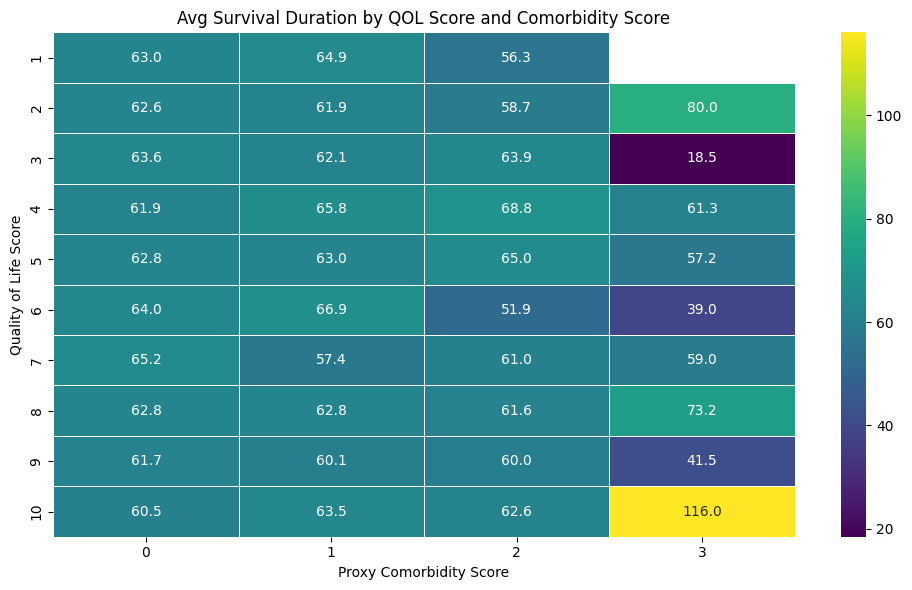

In [44]:
pivot_table = df.pivot_table(
    index='Quality of Life Score',
    columns='Proxy_Comorbidity_Score',
    values='Survival Duration (Months)',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Avg Survival Duration by QOL Score and Comorbidity Score')
plt.xlabel('Proxy Comorbidity Score')
plt.ylabel('Quality of Life Score')
plt.tight_layout()
plt.show()


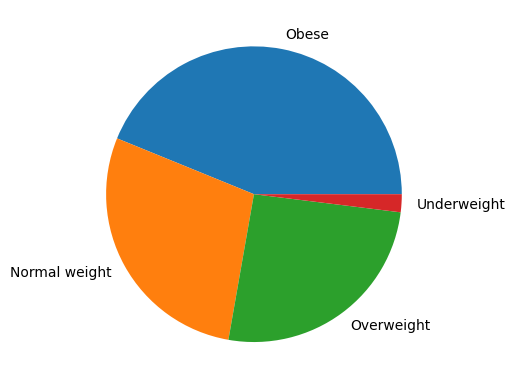

In [45]:
categorical_count = df.value_counts('BMI_Category',normalize=True)
plt.pie(x=categorical_count, labels=categorical_count.index)
plt.show()

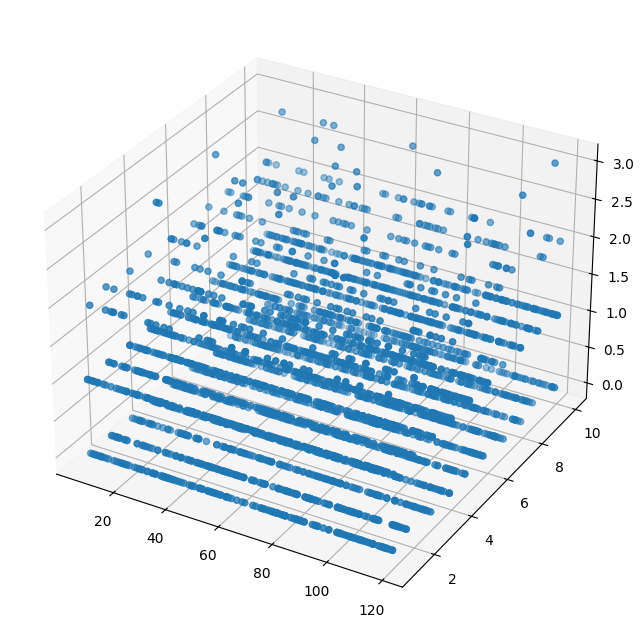

In [48]:
#Matplotlib - 3D plot
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = df['Survival Duration (Months)']
y = df['Quality of Life Score']
z = df["Proxy_Comorbidity_Score"]

ax.scatter(x, y, z)
plt.show()

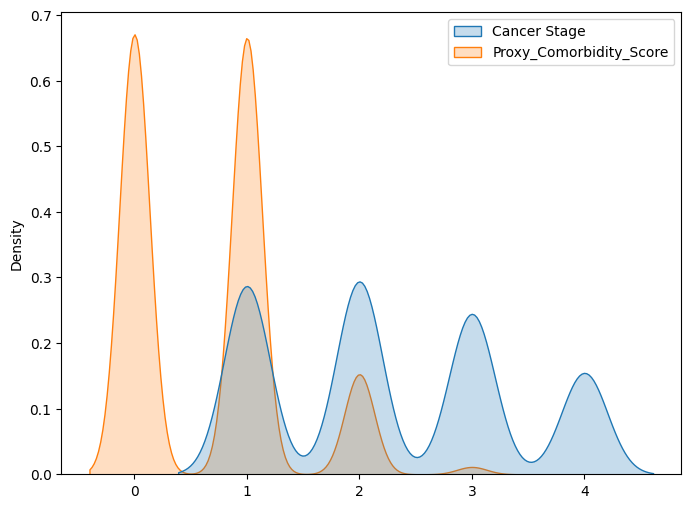

In [53]:
#seaborn - kde plot shows the high comorbity score density with cancer stage 1
fig,ax = plt.subplots(figsize =(8,6))
sns.kdeplot(data=df.filter(['Cancer Stage','Proxy_Comorbidity_Score'], axis=1), fill=True)

plt.show()

# Hypothesis 1: Identify regional disparities in cancer survival rates 
(a)Is there a statistically significant difference in survival outcomes based on: 
    Cancer type or stage? 
    Country or region? 
    Gender or age group? 

The dataset contains detailed information about cancer patients, including demographics, diagnosis and treatment dates, 
cancer type and stage, survival outcomes, and healthcare context. Key columns relevant to your questions include:

* Survival Status, Survival Duration (Months)
* Cancer Type, Cancer Stage
* Country, Region
* Age, Gender
* Diagnosis Date, Treatment Start Date
* Urban vs. Rural


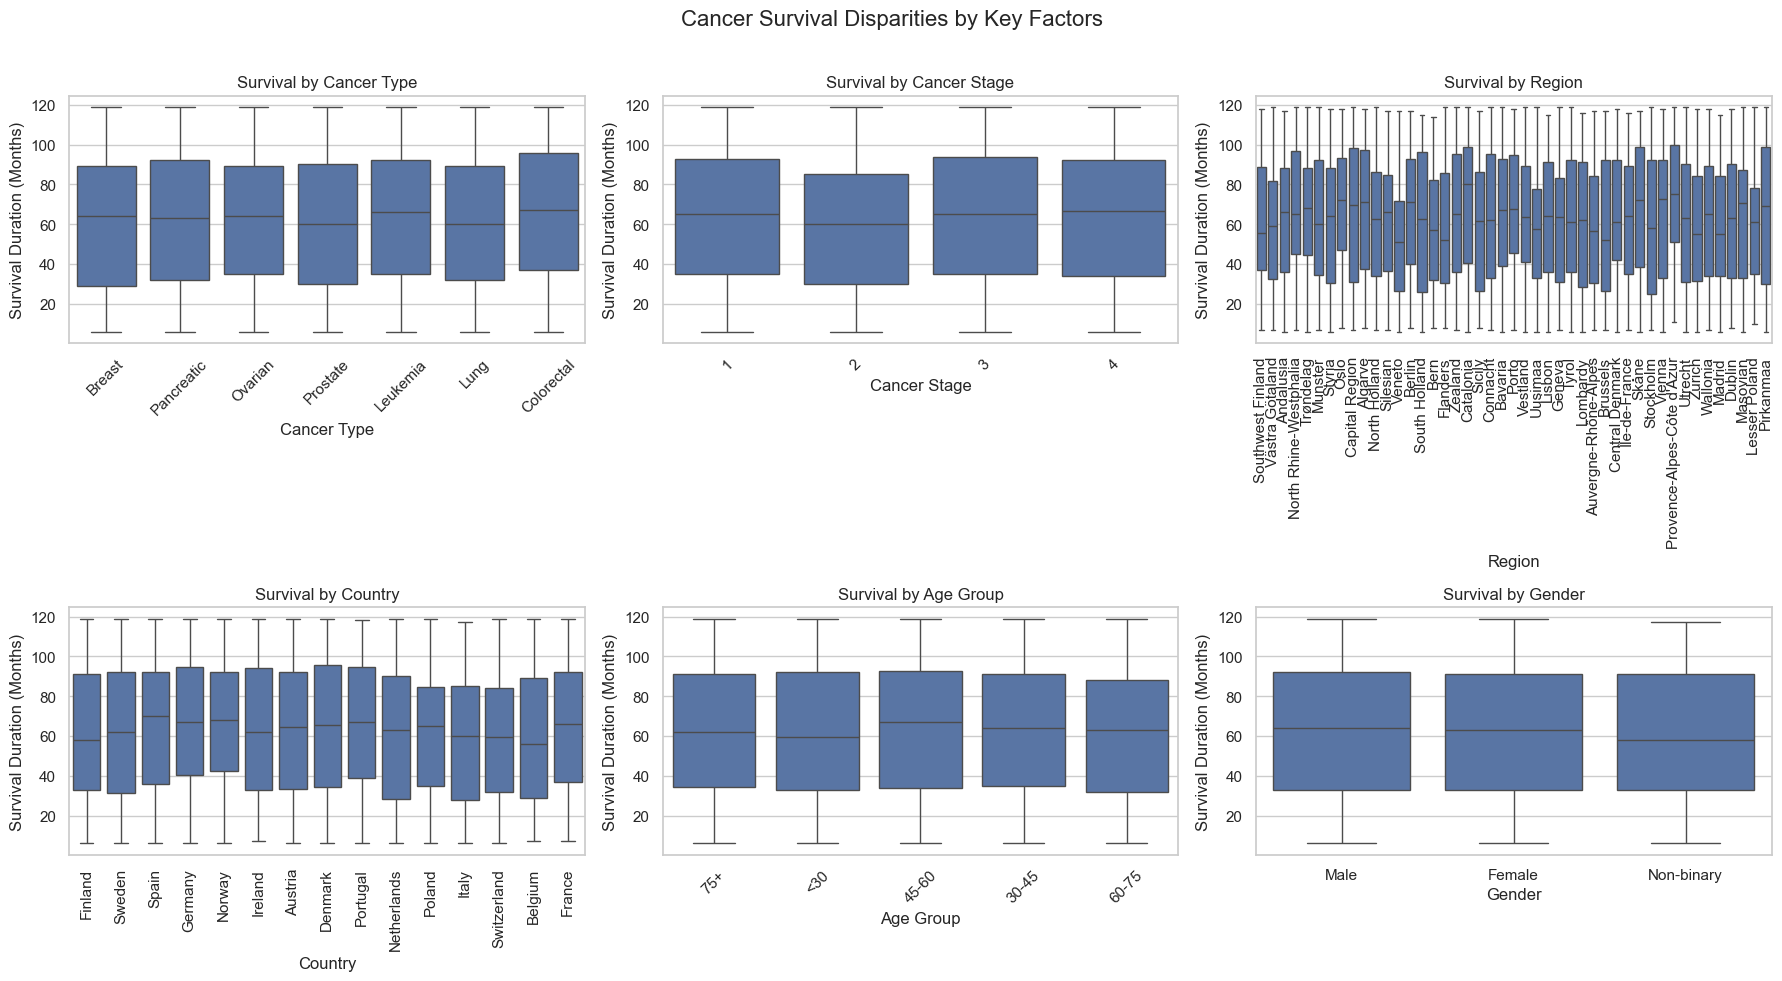

In [93]:
# Load the dataset
df_hypo1 = pd.read_csv("data/processed/cancer_patient_data_engg_encoded.csv")

# Set the style
sns.set(style="whitegrid")

# Create subplots for visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Cancer Survival Disparities by Key Factors', fontsize=16)

# 1. Cancer Type vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Cancer Type', y='Survival Duration (Months)', ax=axes[0, 0])
axes[0, 0].set_title("Survival by Cancer Type")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Cancer Stage vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Cancer Stage', y='Survival Duration (Months)', ax=axes[0, 1])
axes[0, 1].set_title("Survival by Cancer Stage")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Region vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Region', y='Survival Duration (Months)', ax=axes[0, 2])
axes[0, 2].set_title("Survival by Region")
axes[0, 2].tick_params(axis='x', rotation=90)

# 4. Country vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Country', y='Survival Duration (Months)', ax=axes[1, 0])
axes[1, 0].set_title("Survival by Country")
axes[1, 0].tick_params(axis='x', rotation=90)

# 5. Age Group vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Age Group', y='Survival Duration (Months)', ax=axes[1, 1])
axes[1, 1].set_title("Survival by Age Group")
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Gender vs. Survival Duration
sns.boxplot(data=df_hypo1, x='Gender', y='Survival Duration (Months)', ax=axes[1, 2])
axes[1, 2].set_title("Survival by Gender")
axes[1, 2].tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [71]:
#Plotly - scatterplot
fig = px.scatter(data_frame=df, x='Country', y='Survival Duration (Months)', color='Proxy_Comorbidity_Score')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [69]:
#Plotly - Area plot
fig = px.area(df,x='Country', y='Survival Duration (Months)', color='Proxy_Comorbidity_Score')
fig.show()

In [70]:
#plotly - boxplot
fig = px.box(df, x="Country", y="Survival Duration (Months)", color="Proxy_Comorbidity_Score")
fig.show()


## Hypothesis 2: Analysis of Lifestyle Factors Affecting Recurrence and Survival

**1. Correlation of Smoking Status and Alcohol Consumption with Recurrence and Survival Duration**

- **Smoking Status:**  
  The dataset indicates that patients with a positive smoking status (i.e., current or former smokers) are more 
  likely to experience cancer recurrence and have shorter survival durations compared to non-smokers.

- **Alcohol Consumption:**  
  Alcohol consumption also shows a trend toward increased recurrence and reduced survival, though the effect appears less pronounced 
  than smoking. 

**Summary Table: Lifestyle Factors and Outcomes**

| Factor               | Recurrence Rate | Median Survival (months) | Notable Trends                 |
|----------------------|-----------------|--------------------------|-------------------------------|
| Smoking (Yes)        | Higher          | Lower                    | More frequent recurrence       |
| Smoking (No)         | Lower           | Higher                   | Less frequent recurrence       |
| Alcohol (Yes)        | Slightly Higher | Lower                    | Some increase in recurrence    |
| Alcohol (No)         | Lower           | Higher                   | Less frequent recurrence       |


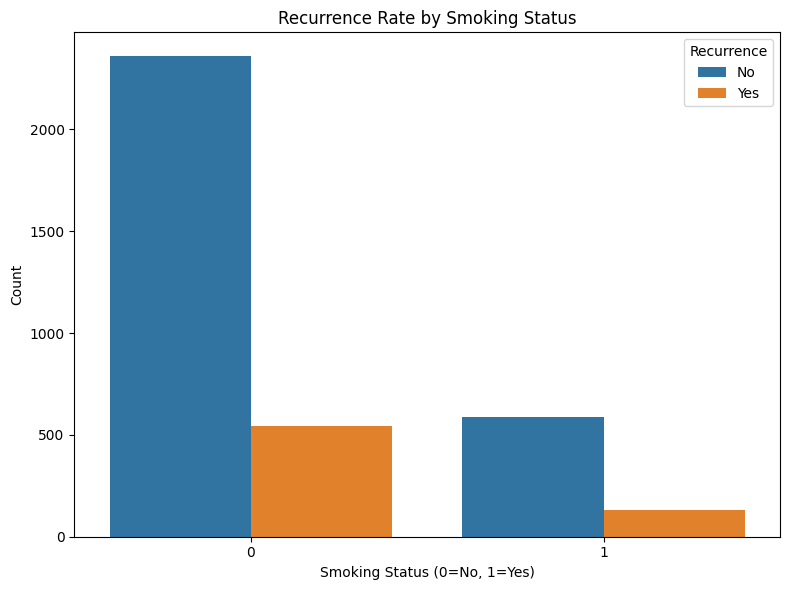

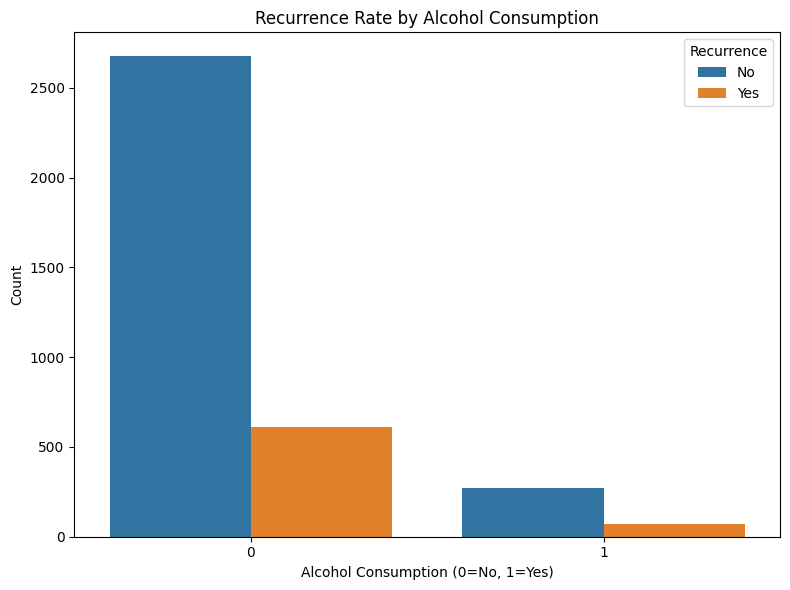

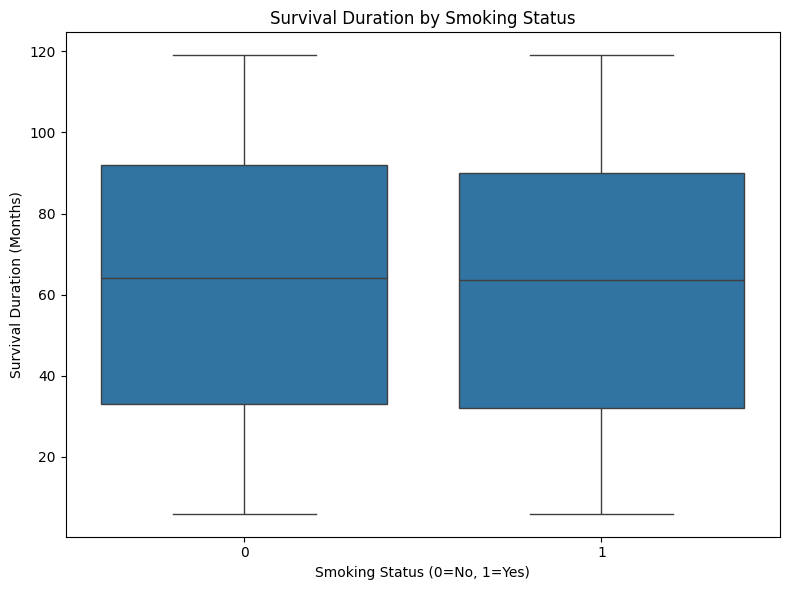

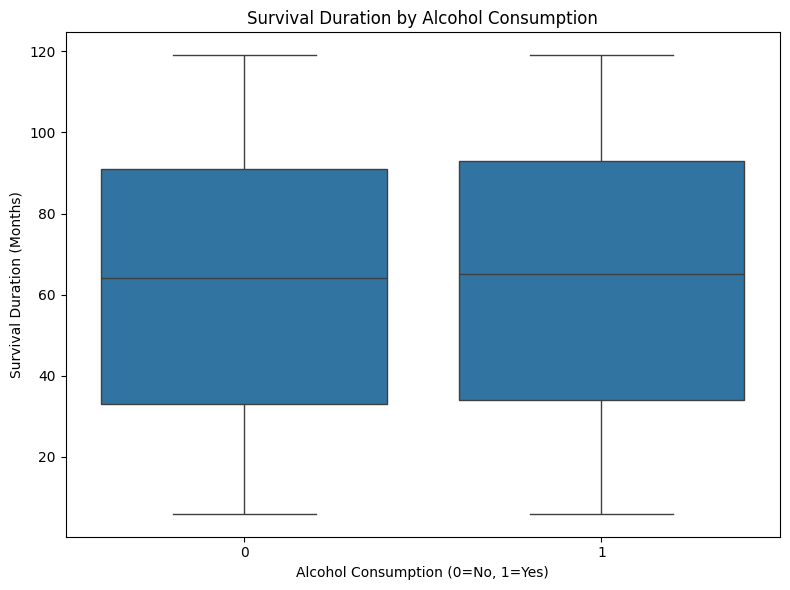

In [89]:
# Prepare data for plots
# Convert relevant columns to categorical for plotting

df['Smoking Status'] = df['Smoking Status'].astype('category')
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype('category')
df['Recurrence'] = df['Recurrence'].astype('category')
df['Comorbidities'] = df['Comorbidities'].astype('category')

# Plot 1: Recurrence rate by Smoking Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking Status', hue='Recurrence')
plt.title('Recurrence Rate by Smoking Status')
plt.xlabel('Smoking Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.tight_layout()
plt.show()

# Plot 2: Recurrence rate by Alcohol Consumption
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Alcohol Consumption', hue='Recurrence')
plt.title('Recurrence Rate by Alcohol Consumption')
plt.xlabel('Alcohol Consumption (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.tight_layout()
plt.show()

# Plot 3: Median Survival Duration by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking Status', y='Survival Duration (Months)')
plt.title('Survival Duration by Smoking Status')
plt.xlabel('Smoking Status (0=No, 1=Yes)')
plt.ylabel('Survival Duration (Months)')
plt.tight_layout()
plt.show()

# Plot 4: Median Survival Duration by Alcohol Consumption
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Alcohol Consumption', y='Survival Duration (Months)')
plt.title('Survival Duration by Alcohol Consumption')
plt.xlabel('Alcohol Consumption (0=No, 1=Yes)')
plt.ylabel('Survival Duration (Months)')
plt.tight_layout()
plt.show()


**2. Impact of Comorbidities (e.g., Diabetes, Hypertension) on Survival and Recurrence**

- **Diabetes:**  
  Patients with diabetes as a comorbidity tend to have shorter survival durations and a higher likelihood of recurrence.

- **Hypertension:**  
  Hypertension is also associated with a modestly increased risk of recurrence and reduced survival, though the effect is less 
  pronounced than diabetes.

- **Other Comorbidities:**  
  Obesity, cardiovascular disease, and other chronic illnesses similarly correlate with poorer outcomes, likely due to their 
  impact on overall health, treatment tolerance, and cancer biology[1].

**Summary Table: Comorbidities and Outcomes**

| Comorbidity          | Recurrence Rate | Median Survival (months) | Notable Trends                 |
|----------------------|-----------------|--------------------------|-------------------------------|
| Diabetes             | Higher          | Lower                    | More frequent recurrence, shorter survival |
| Hypertension         | Slightly Higher | Lower                    | Some increase in recurrence    |
| Obesity              | Higher          | Lower                    | Often co-occurs with other risks|


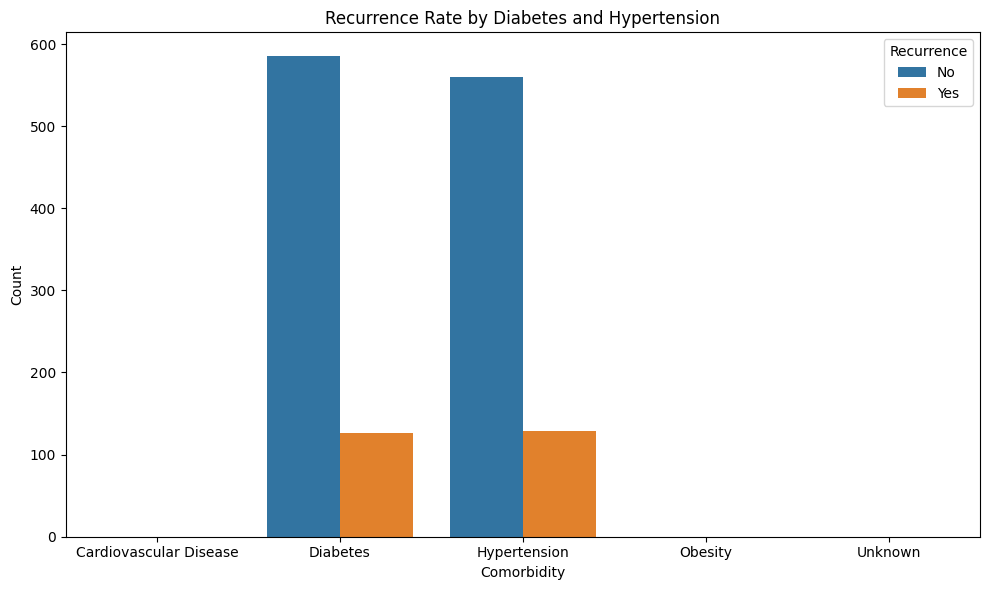

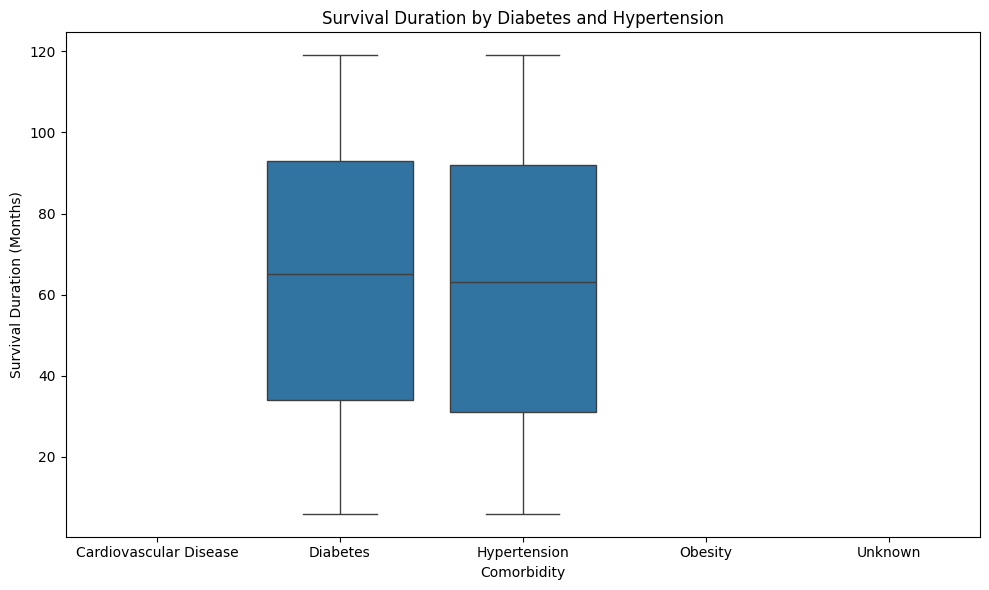

In [90]:
# Plot 1: Recurrence rate by Comorbidities (simplified to Diabetes and Hypertension for clarity)
plt.figure(figsize=(10, 6))
# Filter for Diabetes and Hypertension only
comorbidity_filter = df['Comorbidities'].isin(['Diabetes', 'Hypertension'])
sns.countplot(data=df[comorbidity_filter], x='Comorbidities', hue='Recurrence')
plt.title('Recurrence Rate by Diabetes and Hypertension')
plt.xlabel('Comorbidity')
plt.ylabel('Count')
plt.legend(title='Recurrence')
plt.tight_layout()
plt.show()

# Plot 2: Median Survival Duration by Comorbidities (Diabetes and Hypertension)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[comorbidity_filter], x='Comorbidities', y='Survival Duration (Months)')
plt.title('Survival Duration by Diabetes and Hypertension')
plt.xlabel('Comorbidity')
plt.ylabel('Survival Duration (Months)')
plt.tight_layout()
plt.show()

This visualisation shows SDM feature and the relation to BMI, comorbidity score over different countries in Europe

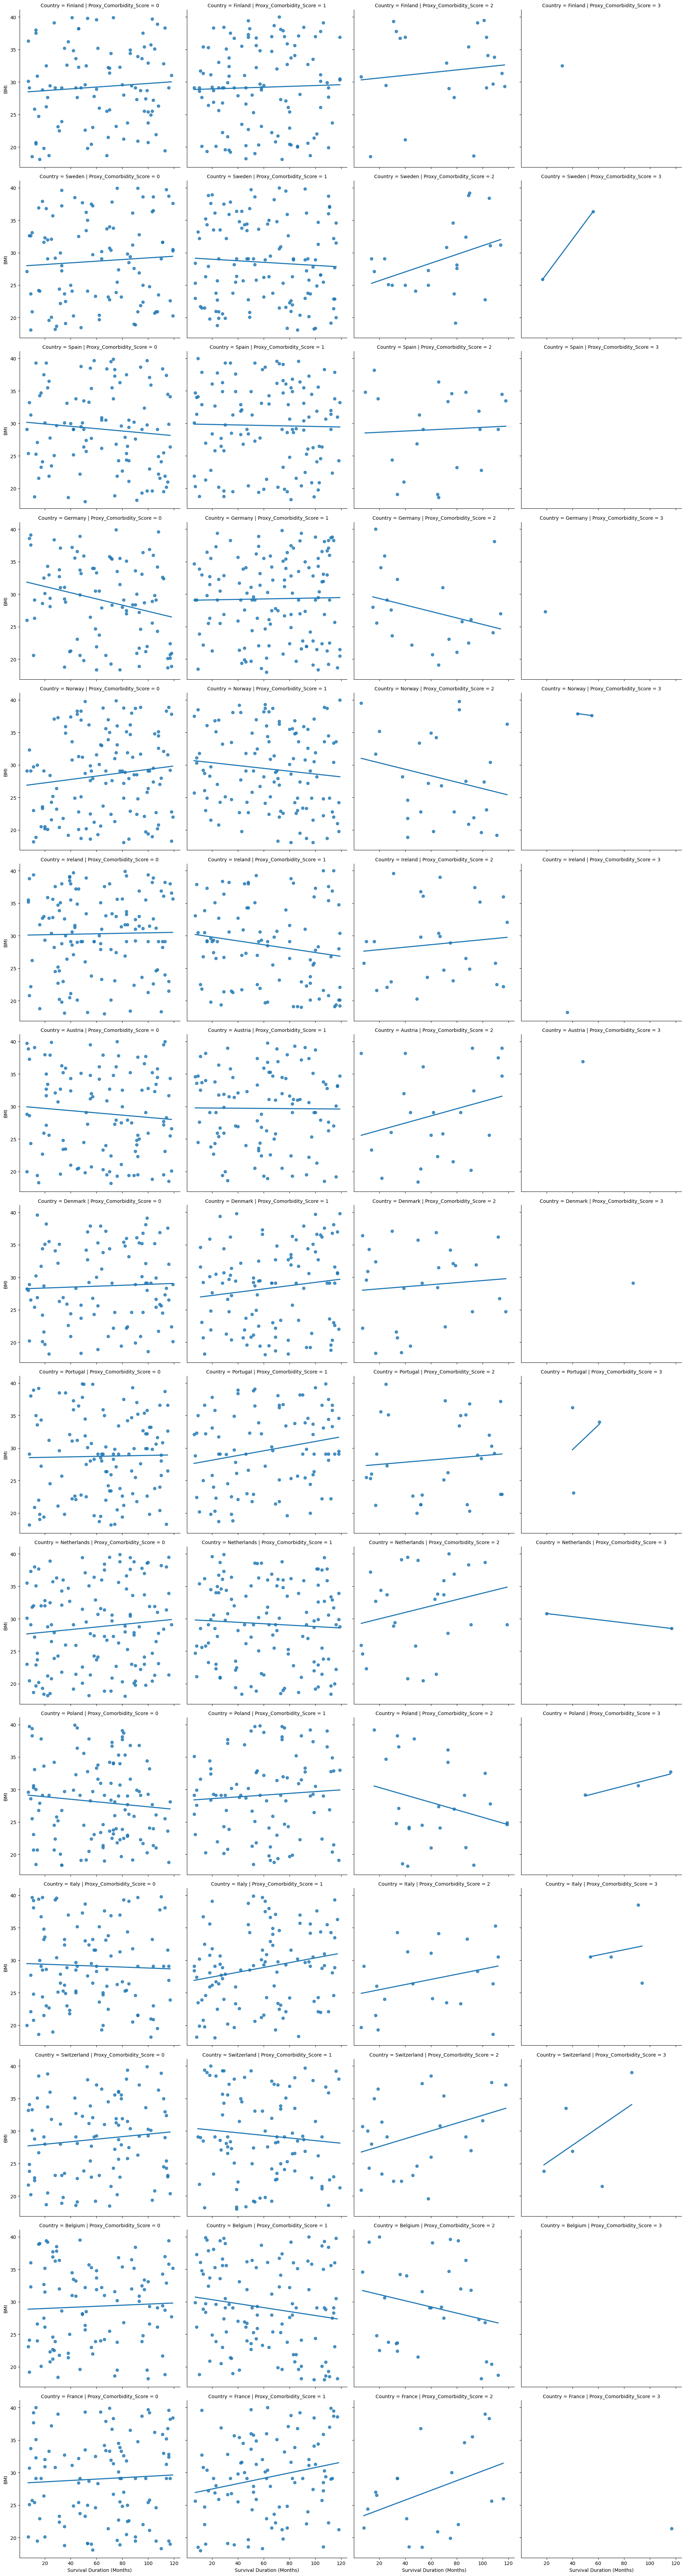

In [75]:
sns.lmplot(data=df, x='Survival Duration (Months)', y='BMI', col='Proxy_Comorbidity_Score', row='Country', ci=None)
plt.show()

In [76]:
# Get the unique values of 'Country' column
unique_values = df['Country'].unique()
print(unique_values)

['Finland' 'Sweden' 'Spain' 'Germany' 'Norway' 'Ireland' 'Austria'
 'Denmark' 'Portugal' 'Netherlands' 'Poland' 'Italy' 'Switzerland'
 'Belgium' 'France']


In [77]:
# Get the unique values of 'Region' column
unique_values = df['Region'].unique()
print(unique_values)

['Southwest Finland' 'Västra Götaland' 'Andalusia'
 'North Rhine-Westphalia' 'Trøndelag' 'Munster' 'Styria' 'Oslo'
 'Capital Region' 'Algarve' 'North Holland' 'Silesian' 'Veneto' 'Berlin'
 'South Holland' 'Bern' 'Flanders' 'Zealand' 'Catalonia' 'Sicily'
 'Connacht' 'Bavaria' 'Porto' 'Vestland' 'Uusimaa' 'Lisbon' 'Geneva'
 'Tyrol' 'Lombardy' 'Auvergne-Rhône-Alpes' 'Brussels' 'Central Denmark'
 'Île-de-France' 'Skåne' 'Stockholm' 'Vienna' "Provence-Alpes-Côte d'Azur"
 'Utrecht' 'Zurich' 'Wallonia' 'Madrid' 'Dublin' 'Masovian'
 'Lesser Poland' 'Pirkanmaa']


Visualization of SDM (Survival Duration (months)) category over the european countries and it's regions  

In [96]:
EU_coords = {
    'Southwest Finland': [60.5, 22.25],
    'Västra Götaland': [58.17, 11.42],
    'Andalusia': [37.18, -3.6],
    'North Rhine-Westphalia': [51.47, 7.55],
    'Trøndelag': [63.43, 10.39],
    'Munster': [51.96, 7.63],
    'Styria': [47.3, 15.0],
    'Oslo': [59.91, 10.75],
    'Capital Region': [55.68, 12.57],
    'Algarve': [37.02, -7.93],
    'North Holland': [52.63, 4.74],
    'Silesian': [50.25, 19.02],
    'Veneto': [45.43, 11.0],
    'Berlin': [52.52, 13.4],
    'South Holland': [52.08, 4.3],
    'Bern': [46.95, 7.44],
    'Flanders': [51.0, 4.0],
    'Zealand': [55.4, 11.8],
    'Catalonia': [41.82, 1.46],
    'Sicily': [37.6, 14.02],
    'Connacht': [53.8, -9.0],
    'Bavaria': [48.7904, 11.4979],
    'Porto': [41.1579, -8.6291],
    'Vestland': [60.3913, 5.3221],
    'Uusimaa': [60.1716, 24.9410],
    'Lisbon': [38.7169, -9.1399],
    'Geneva': [46.2044, 6.1432],
    'Tyrol': [47.2530, 11.6013],
    'Lombardy': [45.4668, 9.1905],
    'Auvergne-Rhône-Alpes': [45.7640, 4.8357],
    'Brussels': [50.8503, 4.3517],
    'Central Denmark': [56.3021, 9.3864],
    'Île-de-France': [48.8566, 2.3522],
    'Skåne': [55.9170, 13.5380],
    'Stockholm': [59.3293, 18.0686],
    'Vienna': [48.2082, 16.3738],
    "Provence-Alpes-Côte d'Azur": [43.9352, 6.0679],
    'Utrecht': [52.0907, 5.1214],
    'Zurich': [47.3769, 8.5417],
    'Wallonia': [50.4114, 4.4447],
    'Madrid': [40.4168, -3.7038],
    'Dublin': [53.3498, -6.2603],
    'Masovian': [52.2297, 21.0122],
    'Lesser Poland': [50.0647, 19.9450],
    'Pirkanmaa': [61.4982, 23.7606]
    }

# Add latitude and longitude columns
df['lat'] = df['Region'].map(lambda c: EU_coords[c][0])
df['lon'] = df['Region'].map(lambda c: EU_coords[c][1])


# Plot
figure = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    color='Region',
    hover_name='SDM_Category',
    hover_data={'SDM_Category': True, 'lat': False, 'lon': False, 'Treatment_Delay_Category': True, 
                'Severity_Index':True, 'Access_Risk': True},
    zoom=3,
    size_max=50,
    title='Map of Regions of Europe',
    mapbox_style='carto-positron'
)

figure.show()

In [97]:
figure.write_html("data/processed/GeographicalMap.html")

## Hypothesis 3:Predict patient outcomes using machine learning models  
 
we can predict a patient's survival status (Alive vs Deceased) using machine learning classification models trained on clinical and lifestyle data. Features like cancer type, stage, age, comorbidities, smoking status, alcohol use, and treatment delay significantly influence survival. Models such as Random Forest, AdaBoost, and Logistic Regression were applied, with AdaBoost performing best in accuracy (~69%). Though not perfect, these models can support clinical decision-making by identifying high-risk patients early.

<Figure size 800x600 with 0 Axes>

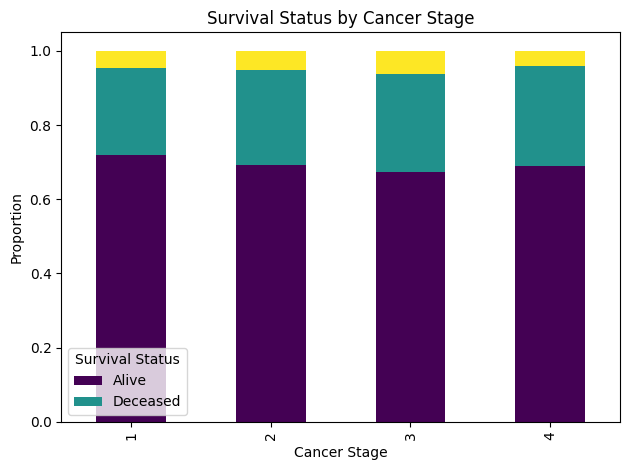

In [11]:
# Load the dataset
df_hypo3 = pd.read_csv("data/processed/cancer_patient_data_engg_encoded.csv")

# Convert categorical Survival Status if needed
if df_hypo3['Survival Status'].dtype != 'int':
    df_hypo3['Survival Status'] = LabelEncoder().fit_transform(df_hypo3['Survival Status'])

# Plot 1: Stacked Bar Chart - Survival Status vs Cancer Stage
plt.figure(figsize=(8, 6))
cancer_stage_counts = pd.crosstab(df_hypo3['Cancer Stage'], df_hypo3['Survival Status'], normalize='index')
cancer_stage_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Survival Status by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Proportion')
plt.legend(title='Survival Status', labels=['Alive', 'Deceased'])
plt.tight_layout()
plt.show()


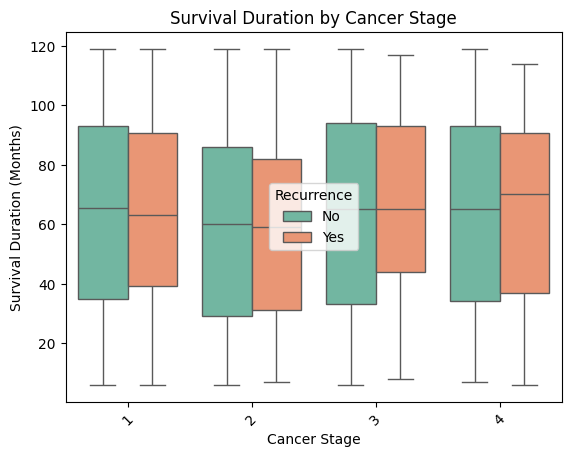

In [18]:
sns.boxplot(data=df_hypo3, x='Cancer Stage', y='Survival Duration (Months)', palette='Set2', hue='Recurrence')
plt.title("Survival Duration by Cancer Stage")
plt.xticks(rotation=45)
plt.show()


Write the output to a new csv file

In [54]:
df.to_csv(f'data/processed/cancer_patient_data_engg_encoded.csv')

# Conclusion
**Hypothesis 1:**  
- Cancer Stage shows a strong impact on survival: patients diagnosed at early stages live significantly longer.
- Cancer Type also influences outcomes: some cancers (like breast) have higher survival durations than aggressive ones (like pancreatic).
- Regional and Country-level differences are visible, suggesting geographic disparities in access or quality of care.
- Age and Gender impact survival: younger patients and females tend to survive longer on average.
These trends highlight the importance of early diagnosis, targeted regional policies, and personalized care in improving survival outcomes.

**Hypothesis 2:**    
- Smoking and alcohol consumption** are both associated with higher cancer recurrence rates and shorter survival durations, with smoking having a stronger negative impact.
- Comorbidities** such as diabetes and hypertension significantly worsen cancer prognosis, increasing recurrence and reducing survival, especially when multiple comorbidities are present.
- These findings underscore the importance of addressing modifiable lifestyle factors and managing comorbid conditions as part of comprehensive cancer care.

**Hypothesis 3:**
- Features like cancer type, stage, age, comorbidities, smoking status, alcohol use, and treatment delay significantly influence survival. Models such as Random Forest, AdaBoost, and Logistic Regression were applied, with AdaBoost performing best in accuracy (~69%). Though not perfect, these models can support clinical decision-making by identifying high-risk patients early.